In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

from munch import Munch
from calendar import month_abbr
import all_my_code as amc

amc.data.set_defaults(resolution=1)


def series_to_dict(series):
    result = {}
    for index, value in series.items():
        if value not in result:
            result[value] = []
        result[value].append(index)
    return result

[AMC] version: 0.3.4.dev1+g3ae82d7


# Figure 9

In [2]:
grp = xr.open_dataset('../fig09_and_fig07_data.nc').sel(region='SO').groupby('time.year')
ds = grp.mean('time')
ds['socat_count'] = grp.sum('time').socat_count
dc = Munch(ds.data_class.to_series().pipe(series_to_dict))

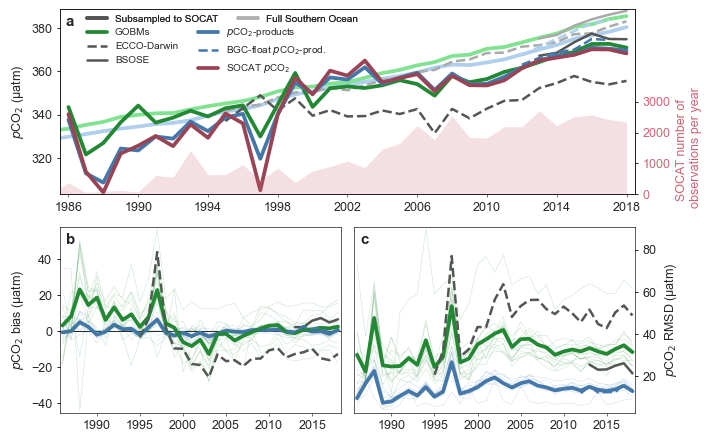

In [ ]:
# if True statements are for code folding only. Makes it easier to troubleshoot the code

if True:  # figure and color setup 
    sns.set_palette('Paired')
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True

    fig = plt.figure(figsize=[8, 5], dpi=90)
    ax = [
        plt.subplot2grid([2, 2], [0, 0], colspan=2),
        plt.subplot2grid([2, 2], [1, 0], colspan=1),
        plt.subplot2grid([2, 2], [1, 1], colspan=1)]

    # colors
    c = Munch(
        gobm="#228833",
        assim="#555555",
        prods="#4477AA",
        socat="#994455")

    c_light = Munch(
        gobm="#81e392",
        assim="#aaaaaa",
        prods="#afcfed",
        socat='#CC6677')

if True:  # (a) pCO2 time series (LH-axes)
    da = ds.spco2
    da.sel(model=dc.pco2_prod       ).mean('model').plot(ax=ax[0], lw=3, ls='-',  c=c_light.prods)
    da.sel(model=dc.gobm            ).mean('model').plot(ax=ax[0], lw=3, ls='-',  c=c_light.gobm)
    da.sel(model=dc.ecco            )              .plot(ax=ax[0], lw=2, ls="--", c=c_light.assim)
    da.sel(model=dc.bsose           )              .plot(ax=ax[0], lw=2, ls="-",  c=c_light.assim)
    da.sel(model=dc.pco2_prod_bushin)              .plot(ax=ax[0], lw=2, ls="--", c=c_light.prods)

    da = ds.spco2_subset_socat
    da.sel(model=dc.gobm).mean('model')     .plot(ax=ax[0], lw=3, ls="-",  c=c.gobm, label="GOBMs")
    da.sel(model=dc.ecco)                   .plot(ax=ax[0], lw=2, ls="--", c=c.assim, label='ECCO-Darwin')
    da.sel(model=dc.bsose)                  .plot(ax=ax[0], lw=2, ls="-",  c=c.assim, label='BSOSE')
    da.sel(model=dc.pco2_prod).mean('model').plot(ax=ax[0], lw=3, ls="-",  c=c.prods, label="$p$CO$_2$-products")
    da.sel(model=dc.pco2_prod_bushin)       .plot(ax=ax[0], lw=2, ls="--", c=c.prods, label='BGC-float $p$CO$_2$-prod.')
    ds.spco2_socat                          .plot(ax=ax[0], lw=3, ls="-",  c=c.socat, label='SOCAT $p$CO$_2$')

if True:  # (a) SOCAT count (RH-axes)
    # create a second RH axes in figure (a) for the SOCAT counts
    ax = np.r_[ax, plt.twinx(ax[0])]
    ax[-1].set_zorder(100)
    ax[-1].set_fc('white')
    ax[-1].fill_between(ds.socat_count.year.values, ds.socat_count.values, 0, color=c_light.socat, lw=0, alpha=0.2)
    ax[-1].set_ylim(0, 6000)
    ax[-1].set_yticks(np.arange(0, 4000, 1000))
    ax[-1].set_yticklabels(np.arange(0, 4000, 1000), color=c_light.socat)
    ax[-1].set_ylabel('SOCAT number of \nobservations per year', y=0.25, color=c_light.socat)
    
    # make sure we can see the second axes
    ax[0].set_fc('w')
    ax[0].set_zorder(2)

if True:  # (b) pCO2 vs SOCAT bias time series
    da = ds.bias
    da.sel(model=dc.pco2_prod).mean('model').plot(ax=ax[1], lw=3, ls="-",  c=c.prods)
    da.sel(model=dc.gobm)     .mean('model').plot(ax=ax[1], lw=3, ls="-",  c=c.gobm)
    da.sel(model=dc.ecco)                   .plot(ax=ax[1], lw=2, ls="--", c=c.assim)
    da.sel(model=dc.bsose)                  .plot(ax=ax[1], lw=2, ls="-",  c=c.assim)
    da.sel(model=dc.pco2_prod_bushin)       .plot(ax=ax[1], lw=2, ls="--", c=c.prods)
    da.sel(model=dc.pco2_prod)              .plot(ax=ax[1], lw=.5, ls="-", c=c.prods, hue='model', alpha=0.2, add_legend=False)
    da.sel(model=dc.gobm)                   .plot(ax=ax[1], lw=.5, ls="-", c=c.gobm, hue='model', alpha=0.2, add_legend=False)
    ax[1].axhline(0, color='k', ls='-', lw=0.5, zorder=0)

if True:  # (c) pCO2 vs SOCAT RMSE time series
    da = ds.rmse
    da.sel(model=dc.pco2_prod).mean('model').plot(ax=ax[2], lw=3, ls="-",  c=c.prods)
    da.sel(model=dc.gobm).mean('model')     .plot(ax=ax[2], lw=3, ls="-",  c=c.gobm)
    da.sel(model=dc.ecco)                   .plot(ax=ax[2], lw=2, ls="--", c=c.assim)
    da.sel(model=dc.bsose)                  .plot(ax=ax[2], lw=2, ls="-",  c=c.assim)
    da.sel(model=dc.pco2_prod_bushin)       .plot(ax=ax[2], lw=2, ls="--", c=c.prods)
    da.sel(model=dc.pco2_prod)              .plot(ax=ax[2], lw=.5, ls="-", c=c.prods, hue='model', alpha=0.2, add_legend=False)
    da.sel(model=dc.gobm)                   .plot(ax=ax[2], lw=.5, ls="-", c=c.gobm, hue='model', alpha=0.2, add_legend=False)
    ax[1].axhline(0, color='k', ls='-', lw=0.5, zorder=0)

if True:  # legends
    # dummy lines
    ax[0].plot(0, 360, lw=3, c='#555555', label='Subsampled to SOCAT')
    ax[0].plot(0, 360, lw=3, c='#aaaaaa', label='Full Southern Ocean', alpha=0.7)

    lines1 = ax[0].get_lines()[5:-2]
    lines2 = ax[0].get_lines()[-2:]
    l1 = ax[0].legend(lines1, [l.get_label() for l in lines1], frameon=False, loc=[0.04,0.62], ncol=2, fontsize=8)
    l2 = ax[0].legend(lines2, [l.get_label() for l in lines2], frameon=False, loc=[0.04,0.90], ncol=2, fontsize=8)

    ax[0].add_artist(l1)
    ax[0].add_artist(l2)

if True:  # general figure settings
    ax[0].set_xlim(1985.5, 2018.5)
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[2].set_xlabel('')

    ax[0].set_ylabel('$p$CO$_2$ (µatm)')
    ax[1].set_ylabel('$p$CO$_2$ bias (µatm)')
    ax[2].set_ylabel('$p$CO$_2$ RMSD (µatm)')

    [a.set_xticks(np.arange(1990, 2020, 5)) for a in ax[1:]]
    [a.set_xticklabels(np.arange(1990, 2020, 5).astype(str)) for a in ax[1:]]
    ax[0].set_xticks(np.arange(1986, 2020, 4))
    ax[0].set_xticklabels(np.arange(1986, 2020, 4).astype(str))

    ax[2].yaxis.set_label_position("right")
    ax[2].yaxis.tick_right()

    [a.set_title('') for a in ax]
    labels = amc.viz.label_subplots(ax[:3])
    for a in ax:
        plt.sca(a)
        xticks = plt.xticks(rotation=0, ha='center')
    
plt.tight_layout()
# fig.savefig('./fig9_spco2_vs_socat_with_count.png', bbox_inches='tight', dpi=300)
# fig.savefig('./fig9_spco2_vs_socat_with_count.pdf', bbox_inches='tight', dpi=300)

# Supplementary

In [3]:
# plt.rcParams['axes.prop_cycle'] = plt.style.library['fivethirtyeight']['axes.prop_cycle']

ds = xr.open_dataset('../fig09_and_fig07_data.nc').load().groupby('time.season').mean('time')
dc = Munch(ds.data_class.to_series().pipe(series_to_dict))

dominant = [
    'CCSM_WHOI',
    'CESM_ETHZ',
    'MRI_ESM2_1',
    'NorESM_OC1_2',
    'ORCA025_GEOMAR']
weak = [
    'CNRM_ESM2_1',
    'EC_Earth3',
    'FESOM_REcoM_HR',
    'FESOM_REcoM_LR',
    'MOM6_Princeton',
    'ORCA1_LIM3_PISCES',
    'PlankTOM12']
prods = dc.pco2_prod

In [4]:
ssn = ["DJF", 'MAM', "JJA", "SON"]
model_avg = lambda x: x.sel(season=ssn).mean('model')
model_std = lambda x: x.sel(season=ssn).std('model')

def std_ribbon(da, ax, **props):
    std = xr.concat([
        model_avg(da) + model_std(da),
        model_avg(da) - model_std(da),
    ], dim='bound')
    
    x = np.arange(0, 4)
    ax.fill_between(x, std[0], std[1], **props)
    
def plot_avg_with_ribbon(da, ax, **props):
    avg = model_avg(da)
    
    avg.to_series().plot(ax=ax, lw=0.5, marker='o', **props)
    std_ribbon(da, ax, alpha=0.4, color=props.get("c"), lw=0)

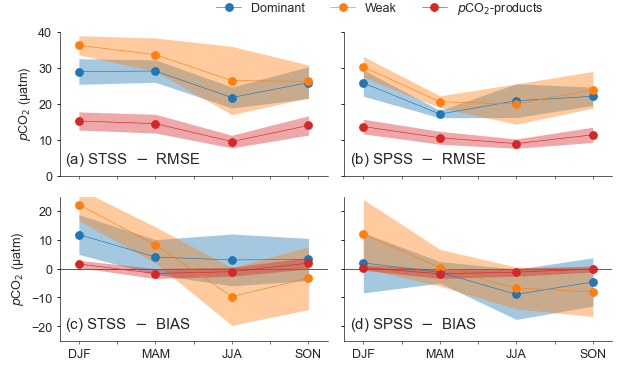

In [13]:
fig, ax = plt.subplots(2, 2, figsize=[7, 4], sharey='row', sharex=True, dpi=90)
ax = ax.flatten()

plot_da_as_ser = lambda x, **props: x.to_series().plot(lw=0.5, ms=5, marker='o', **props)


c_domt = "C0"
c_weak = "C1"
c_prod = "C3"
if True:
    plot_avg_with_ribbon(ds.rmse.sel(region='STSS', model=dominant), ax=ax[0], c=c_domt, label="Dominant")
    plot_avg_with_ribbon(ds.bias.sel(region='STSS', model=dominant), ax=ax[2], c=c_domt)

    plot_avg_with_ribbon(ds.rmse.sel(region='STSS', model=weak    ), ax=ax[0], c=c_weak, label="Weak")
    plot_avg_with_ribbon(ds.bias.sel(region='STSS', model=weak    ), ax=ax[2], c=c_weak)

    plot_avg_with_ribbon(ds.rmse.sel(region='STSS', model=prods   ), ax=ax[0], c=c_prod, label="$p$CO$_2$-products")
    plot_avg_with_ribbon(ds.bias.sel(region='STSS', model=prods   ), ax=ax[2], c=c_prod)


    plot_avg_with_ribbon(ds.rmse.sel(region='SPSS', model=dominant), ax=ax[1], c=c_domt, label="Dominant")
    plot_avg_with_ribbon(ds.bias.sel(region='SPSS', model=dominant), ax=ax[3], c=c_domt)

    plot_avg_with_ribbon(ds.rmse.sel(region='SPSS', model=weak    ), ax=ax[1], c=c_weak, label="Weak")
    plot_avg_with_ribbon(ds.bias.sel(region='SPSS', model=weak    ), ax=ax[3], c=c_weak)

    plot_avg_with_ribbon(ds.rmse.sel(region='SPSS', model=prods   ), ax=ax[1], c=c_prod, label="$p$CO$_2$-products")
    plot_avg_with_ribbon(ds.bias.sel(region='SPSS', model=prods   ), ax=ax[3], c=c_prod)


    ax[2].axhline(0, color='k', zorder=0, lw=0.5)
    ax[3].axhline(0, color='k', zorder=0, lw=0.5)

    ax[0].set_xlim(-0.25, 3.25)
    ax[0].set_ylim(0, 40)
    ax[2].set_ylim(-25, 25)

    ax[0].set_ylabel('$p$CO$_2$ (µatm)')
    ax[2].set_ylabel('$p$CO$_2$ (µatm)')
    ax[0].set_title('(a) STSS  $-$  RMSE', x=0.02, y=0.0, ha='left', va='bottom')
    ax[1].set_title('(b) SPSS  $-$  RMSE', x=0.02, y=0.0, ha='left', va='bottom')
    ax[2].set_title('(c) STSS  $-$  BIAS', x=0.02, y=0.0, ha='left', va='bottom')
    ax[3].set_title('(d) SPSS  $-$  BIAS', x=0.02, y=0.0, ha='left', va='bottom')

    ax[2].set_xlabel('')
    ax[3].set_xlabel('')

    fig.tight_layout()

    lines = list(ax[0].get_lines())
    labels = [l.get_label() for l in lines]
    fig.legend(lines, labels, edgecolor='w', loc=[0.34, 0.94], ncol=3, framealpha=0.5)

fig.savefig('./figureS13_spco2_vs_socat.pdf', bbox_inches='tight')